In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5571 non-null   object
 1   v2      5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isna().sum()

v1    1
v2    1
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [11]:
df.shape

(5168, 2)

In [12]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [13]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['target']=label.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [15]:
df['target'].value_counts()

target
0    4515
1     653
Name: count, dtype: int64

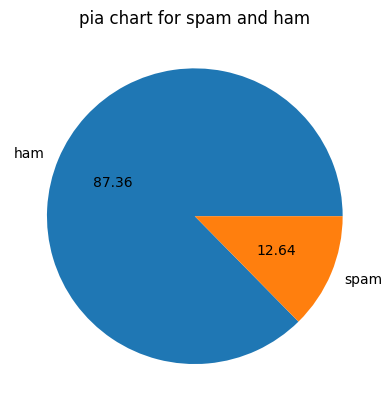

In [16]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.title("pia chart for spam and ham")
plt.show()

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dnyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters']=df['text'].apply(len)

In [19]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df[df['target']==1][['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
df[df['target']==0][['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,4515.000000,4515.000000,4515.000000
mean,70.474197,17.127353,1.820377
std,56.355504,13.493330,1.383756
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

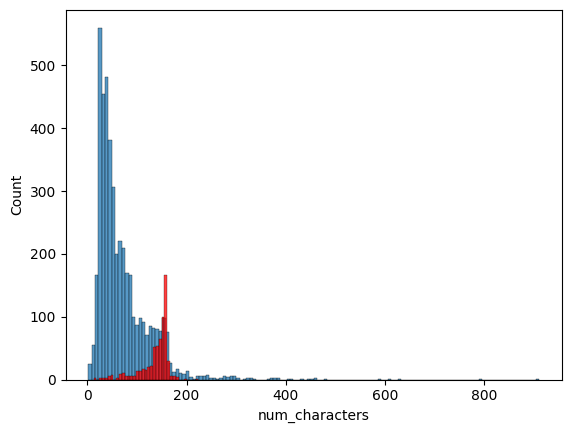

In [23]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

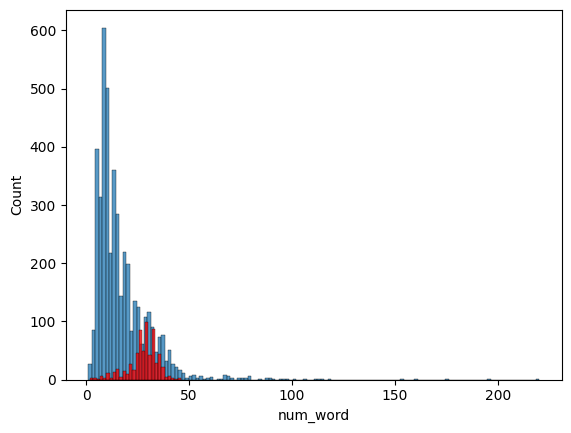

In [24]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

In [25]:
df

,target,text,num_characters,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


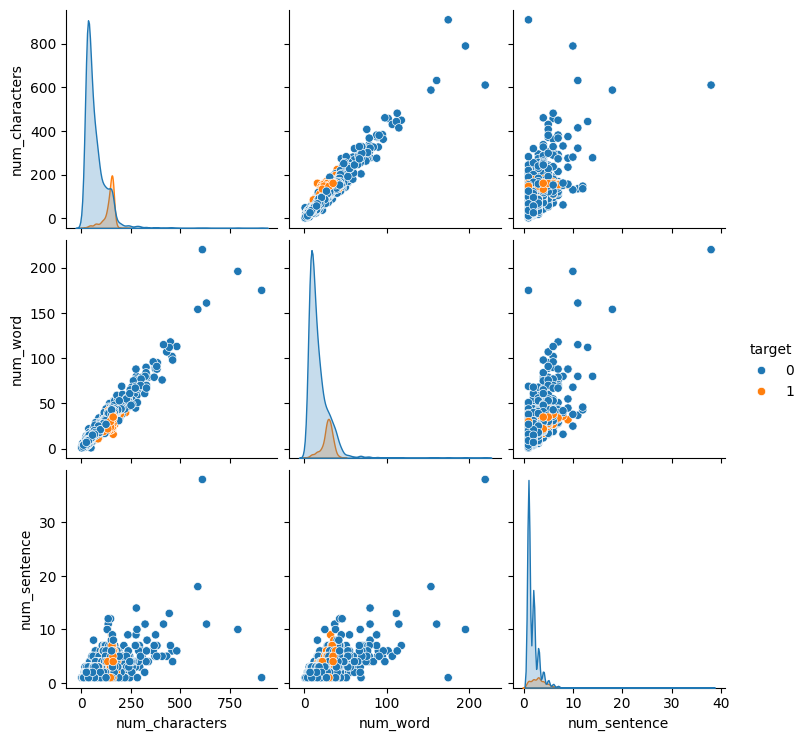

In [26]:
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

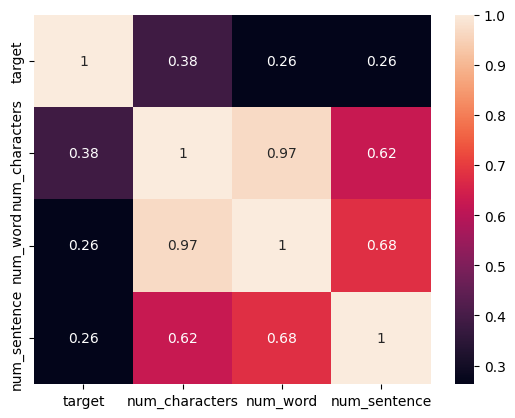

In [27]:
df1=df.drop('text',axis=1)
sns.heatmap(df1.corr(),annot=True)

Transform text

In [28]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
stopword_list=stopwords.words('english')
ps=PorterStemmer()

In [29]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopword_list and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)    

In [30]:
df['tranformed_text']=df['text'].apply(transform_text)

In [31]:
df

,target,text,num_characters,num_word,num_sentence,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [32]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['tranformed_text'].str.cat(sep=" "))

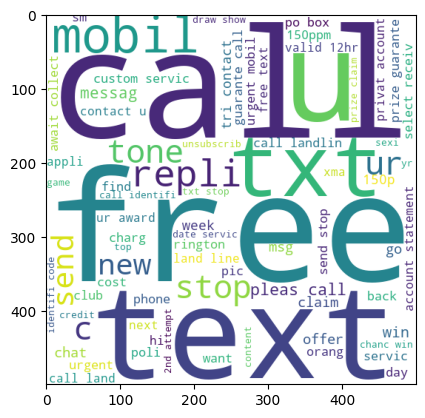

In [33]:
plt.imshow(spam_wc)

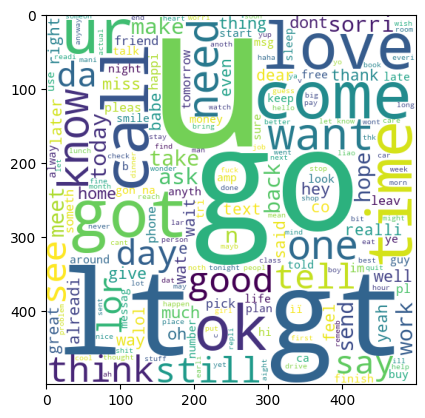

In [34]:
ham_wc=wc.generate(df[df['target']==0]['tranformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [35]:
spam_msg=[]
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_msg.append(word)

In [36]:
from collections import Counter
Counter(spam_msg)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [37]:
ham_msg=[]
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_msg.append(word)

In [38]:
Counter(ham_msg)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

C:\Users\dnyan\AppData\Local\Temp\ipykernel_18876\212116722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_msg).most_common(30))[0],y=pd.DataFrame(Counter(spam_msg).most_common(30))[1],palette='viridis')


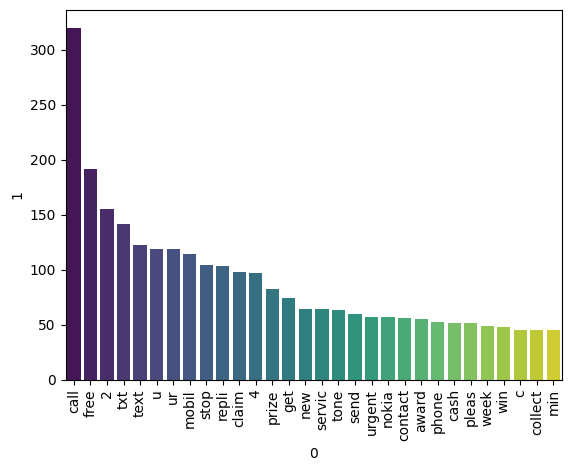

In [39]:
sns.barplot(x=pd.DataFrame(Counter(spam_msg).most_common(30))[0],y=pd.DataFrame(Counter(spam_msg).most_common(30))[1],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\dnyan\AppData\Local\Temp\ipykernel_18876\1568254354.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_msg).most_common(30))[0],y=pd.DataFrame(Counter(ham_msg).most_common(30))[1],palette='viridis')


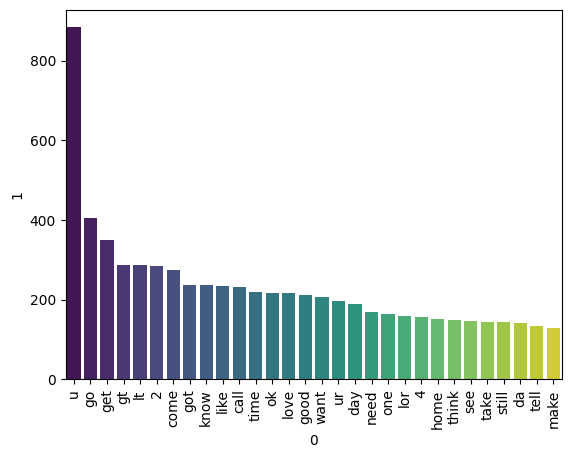

In [40]:
sns.barplot(x=pd.DataFrame(Counter(ham_msg).most_common(30))[0],y=pd.DataFrame(Counter(ham_msg).most_common(30))[1],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [41]:
df

,target,text,num_characters,num_word,num_sentence,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# model Building

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [95]:
x=cv.fit_transform(df['tranformed_text']).toarray()
x.shape

(5168, 6707)

In [96]:
y=df['target'].values
y.shape

(5168,)

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [99]:
GNB=GaussianNB()
MNB=MultinomialNB()
BNB=BernoulliNB()

In [100]:
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}\n")
print("*"*60)
print(f"confusion_matrix:\n{confusion_matrix(y_test,y_pred)}")
print("*"*60)
print(f"classification_report:\n{classification_report(y_test,y_pred)}",end=" ")
print("*"*60)
print(f"precision_score:{round(precision_score(y_test,y_pred),2)}")


accuracy_score:0.8655705996131529

************************************************************
confusion_matrix:
[[785 116]
 [ 23 110]]
************************************************************
classification_report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       901
           1       0.49      0.83      0.61       133

    accuracy                           0.87      1034
   macro avg       0.73      0.85      0.77      1034
weighted avg       0.91      0.87      0.88      1034
 ************************************************************
precision_score:0.49


In [101]:
MNB.fit(x_train,y_train)
y_pred=MNB.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}\n")
print("*"*60)
print(f"confusion_matrix:\n{confusion_matrix(y_test,y_pred)}")
print("*"*60)
print(f"classification_report:\n{classification_report(y_test,y_pred)}",end=" ")
print(f"precision_score:{round(precision_score(y_test,y_pred),2)}")

accuracy_score:0.9729206963249516

************************************************************
confusion_matrix:
[[887  14]
 [ 14 119]]
************************************************************
classification_report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       901
           1       0.89      0.89      0.89       133

    accuracy                           0.97      1034
   macro avg       0.94      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034
 precision_score:0.89


In [102]:
BNB.fit(x_train,y_train)
y_pred=BNB.predict(x_test)
print(f"accuracy_score:{accuracy_score(y_test,y_pred)}\n")
print("*"*60)
print(f"confusion_matrix:\n{confusion_matrix(y_test,y_pred)}")
print("*"*60)
print(f"classification_report:\n{classification_report(y_test,y_pred)}",end=" ")
print(f"precision_score:{round(precision_score(y_test,y_pred),2)}")

accuracy_score:0.9690522243713733

************************************************************
confusion_matrix:
[[899   2]
 [ 30 103]]
************************************************************
classification_report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       901
           1       0.98      0.77      0.87       133

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.97      1034
 precision_score:0.98


In [103]:
model=[GNB,MNB,BNB]
accuracy_score_list=[]
precision_score_list=[]
for i in model:
    i.fit(x_train,y_train)
    y_pred1=i.predict(x_test)
    accuracy_score_list.append(round(accuracy_score(y_test,y_pred1),2))
    precision_score_list.append(round(precision_score(y_test,y_pred1),2))

In [104]:
print(accuracy_score_list)
print(precision_score_list)

[0.87, 0.97, 0.97]
[0.49, 0.89, 0.98]


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [106]:
SVM=SVC(kernel='rbf')
bnn=BernoulliNB()
RF=RandomForestClassifier(n_estimators=100,random_state=42)
Gbt=GradientBoostingClassifier(n_estimators=100,random_state=42)
xgb=XGBClassifier()
knn=KNeighborsClassifier(n_neighbors=10)
dtree=DecisionTreeClassifier()

In [107]:
models={
    'svm':SVM,
    'bnn':bnn,
    'Rf':RF,
    'Gbt':Gbt,
    'xgb':xgb,
    'knn':knn,
    'dtree':dtree
}

In [111]:
model_op=[]
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    model_op.append({
        'model':name,
        'accuracy':accuracy,
        'precision':precision
    })
output=pd.DataFrame(model_op)
print(output)

   model  accuracy  precision
0    svm  0.967118   0.990099
1    bnn  0.969052   0.980952
2     Rf  0.965184   1.000000
3    Gbt  0.952611   0.920000
4    xgb  0.977756   0.974138
5    knn  0.885880   1.000000
6  dtree  0.952611   0.850000


In [112]:
import joblib
joblib.dump(BNB,"model.joblib")
joblib.dump(cv,"vectorizer.joblib")

['vectorizer.joblib']

In [113]:
joblib.dump(transform_text,"transform.joblib")

['transform.joblib']